<a href="https://colab.research.google.com/github/lmencisoe/CDA-Proyecto/blob/main/2_ANALITICA_DATOS_INMUEBLES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
basa_global_analitica=pd.read_csv("/content/drive/MyDrive/Datos_proyecto_ciencia_de_datos/data_limpia.csv")

In [ ]:
basa_global_analitica.head()

,tipo,area,banos,estrato,garajes,habitaciones,ascensores,piso,fecha,precio,latitud,longitud,gimnasio,porteria,salon,zonas_humedas,obra_gris,piscina
0,0,35.0,1,5,1,1,1.0,1,2022-07-22,2.450000e+08,4.69525,-74.056,0,1,0,0.0,0.0,0.0
1,0,47.0,1,5,1,1,1.0,3,2021-07-08,3.205500e+08,4.64661,-74.083,0,0,0,0.0,0.0,0.0
2,0,54.0,1,6,1,1,1.0,3,2021-06-09,2.338118e+08,4.69042,-74.044,0,1,0,0.0,0.0,0.0
3,0,113.0,3,4,2,2,1.0,7,2022-06-16,7.248624e+08,4.65033,-74.109,0,1,0,0.0,0.0,0.0
4,1,55.0,2,2,0,3,0.0,0,2021-06-09,1.388750e+08,4.66698,-74.157,0,1,1,0.0,0.0,0.0


In [ ]:
basa_global_analitica.shape

(201404, 18)

In [ ]:
with pd.option_context('display.float_format', lambda x: f'{x:,.3f}'):
    display(basa_global_analitica)

,tipo,area,banos,estrato,garajes,habitaciones,ascensores,piso,fecha,precio,latitud,longitud,gimnasio,porteria,salon,zonas_humedas,obra_gris,piscina
0,0,35.000,1,5,1,1,1.000,1,2022-07-22,"245,000,000.000",4.695,-74.056,0,1,0,0.000,0.000,0.000
1,0,47.000,1,5,1,1,1.000,3,2021-07-08,"320,550,000.000",4.647,-74.083,0,0,0,0.000,0.000,0.000
2,0,54.000,1,6,1,1,1.000,3,2021-06-09,"233,811,807.000",4.690,-74.044,0,1,0,0.000,0.000,0.000
3,0,113.000,3,4,2,2,1.000,7,2022-06-16,"724,862,353.368",4.650,-74.109,0,1,0,0.000,0.000,0.000
4,1,55.000,2,2,0,3,0.000,0,2021-06-09,"138,875,000.000",4.667,-74.157,0,1,1,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201399,1,145.000,3,5,2,3,0.000,0,2019-12-01,"731,158,200.000",0.000,0.000,1,1,1,0.000,1.000,1.000
201400,1,274.000,4,5,4,3,0.000,0,2020-01-01,"1,316,760,000.000",4.948,-74.014,1,1,1,0.000,1.000,1.000
201401,0,57.430,2,4,1,2,0.000,3,2019-10-01,"241,206,000.000",4.923,-74.041,1,1,1,0.000,1.000,0.000
201402,0,90.010,2,4,1,3,0.000,3,2020-02-01,"378,042,000.000",4.923,-74.041,1,1,1,0.000,1.000,0.000


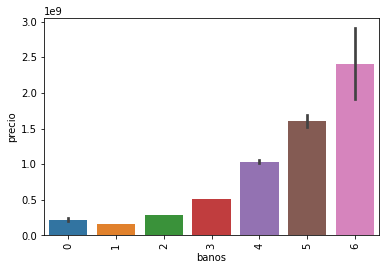

In [ ]:
sns.barplot(x=basa_global_analitica['banos'],y=basa_global_analitica['precio'])
plt.xticks(rotation='vertical')
plt.show()

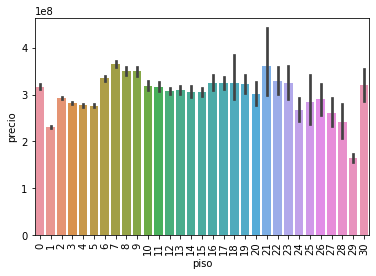

In [ ]:
sns.barplot(x=basa_global_analitica['piso'],y=basa_global_analitica['precio'])
plt.xticks(rotation='vertical')
plt.show()

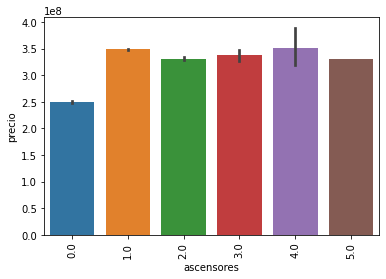

In [ ]:
sns.barplot(x=basa_global_analitica['ascensores'],y=basa_global_analitica['precio'])
plt.xticks(rotation='vertical')
plt.show()

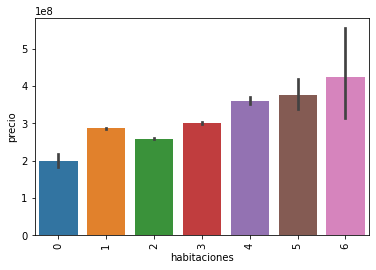

In [ ]:
sns.barplot(x=basa_global_analitica['habitaciones'],y=basa_global_analitica['precio'])
plt.xticks(rotation='vertical')
plt.show()

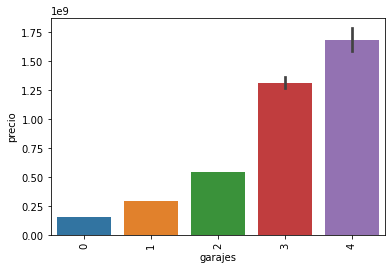

In [ ]:
sns.barplot(x=basa_global_analitica['garajes'],y=basa_global_analitica['precio'])
plt.xticks(rotation='vertical')
plt.show()

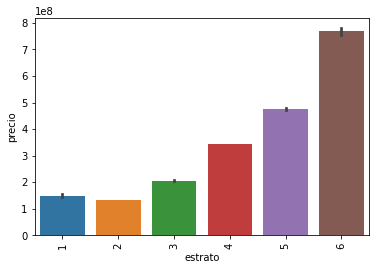

In [ ]:
sns.barplot(x=basa_global_analitica['estrato'],y=basa_global_analitica['precio'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
with pd.option_context('display.float_format', lambda x: f'{x:,.3f}'):
    display(basa_global_analitica[['banos','precio']].groupby(basa_global_analitica['banos']).mean())

,banos,precio
banos,,
0,0.000,"222,237,432.136"
1,1.000,"164,039,833.549"
2,2.000,"282,196,308.746"
3,3.000,"514,785,815.913"
4,4.000,"1,034,219,814.674"
5,5.000,"1,600,918,689.207"
6,6.000,"2,406,026,483.205"


In [ ]:
with pd.option_context('display.float_format', lambda x: f'{x:,.3f}'):
    display(basa_global_analitica[['area','precio']].groupby(basa_global_analitica['area']).mean())

,area,precio
area,,
0.000,0.000,"238,357,836.000"
7.000,7.000,"256,160,563.000"
14.250,14.250,"137,000,000.000"
15.000,15.000,"120,000,000.000"
16.000,16.000,"134,450,000.000"
...,...,...
723.000,723.000,"9,500,000,000.000"
783.000,783.000,"2,419,000,000.000"
"1,153.000","1,153.000","280,000,000.000"


In [ ]:
with pd.option_context('display.float_format', lambda x: f'{x:,.3f}'):
    display(basa_global_analitica[['estrato','precio']].groupby(basa_global_analitica['estrato']).mean())

,estrato,precio
estrato,,
1,1.000,"148,794,196.817"
2,2.000,"132,376,465.762"
3,3.000,"206,234,142.860"
4,4.000,"343,366,163.380"
5,5.000,"476,643,271.761"
6,6.000,"767,472,129.655"


In [ ]:
with pd.option_context('display.float_format', lambda x: f'{x:,.3f}'):
    display(basa_global_analitica[['garajes','precio']].groupby(basa_global_analitica['garajes']).mean())

,garajes,precio
garajes,,
0,0.000,"157,061,802.032"
1,1.000,"295,193,517.695"
2,2.000,"546,180,691.145"
3,3.000,"1,316,408,326.410"
4,4.000,"1,684,161,224.425"


In [ ]:
with pd.option_context('display.float_format', lambda x: f'{x:,.3f}'):
    display(basa_global_analitica[['habitaciones','precio']].groupby(basa_global_analitica['habitaciones']).mean())

,habitaciones,precio
habitaciones,,
0,0.000,"198,646,151.031"
1,1.000,"286,139,817.502"
2,2.000,"258,299,613.591"
3,3.000,"300,732,732.015"
4,4.000,"360,371,013.279"
5,5.000,"375,321,478.881"
6,6.000,"423,490,871.186"


In [ ]:
with pd.option_context('display.float_format', lambda x: f'{x:,.3f}'):
    display(basa_global_analitica[['ascensores','precio']].groupby(basa_global_analitica['ascensores']).mean())

,ascensores,precio
ascensores,,
0.000,0.000,"249,578,118.034"
1.000,1.000,"348,621,184.350"
2.000,2.000,"331,234,774.885"
3.000,3.000,"337,179,838.385"
4.000,4.000,"351,050,444.546"
5.000,5.000,"329,688,888.889"


In [ ]:
with pd.option_context('display.float_format', lambda x: f'{x:,.3f}'):
    display(basa_global_analitica[['piso','precio']].groupby(basa_global_analitica['piso']).mean())

,piso,precio
piso,,
0,0.000,"316,690,596.344"
1,1.000,"231,040,835.742"
2,2.000,"291,751,471.776"
3,3.000,"281,274,817.874"
4,4.000,"276,815,088.928"
5,5.000,"276,213,311.221"
6,6.000,"334,376,977.961"
7,7.000,"366,135,366.150"
8,8.000,"350,756,575.184"


In [ ]:
with pd.option_context('display.float_format', lambda x: f'{x:,.3f}'):
    display(basa_global_analitica[['gimnasio','precio']].groupby(basa_global_analitica['gimnasio']).mean())

,gimnasio,precio
gimnasio,,
0,0.000,"265,860,863.002"
1,1.000,"418,462,600.678"


In [ ]:
with pd.option_context('display.float_format', lambda x: f'{x:,.3f}'):
    display(basa_global_analitica[['porteria','precio']].groupby(basa_global_analitica['porteria']).mean())

,porteria,precio
porteria,,
0,0.000,"278,802,840.314"
1,1.000,"294,327,723.020"


In [ ]:
with pd.option_context('display.float_format', lambda x: f'{x:,.3f}'):
    display(basa_global_analitica[['salon','precio']].groupby(basa_global_analitica['salon']).mean())

,salon,precio
salon,,
0,0.000,"313,829,576.342"
1,1.000,"285,238,702.796"


In [ ]:
with pd.option_context('display.float_format', lambda x: f'{x:,.3f}'):
    display(basa_global_analitica[['zonas_humedas','precio']].groupby(basa_global_analitica['zonas_humedas']).mean())

,zonas_humedas,precio
zonas_humedas,,
0.000,0.000,"278,677,489.354"
1.000,1.000,"402,305,193.386"


In [ ]:
with pd.option_context('display.float_format', lambda x: f'{x:,.3f}'):
    display(basa_global_analitica[['obra_gris','precio']].groupby(basa_global_analitica['obra_gris']).mean())

,obra_gris,precio
obra_gris,,
0.000,0.000,"269,999,716.408"
1.000,1.000,"505,842,335.624"


In [ ]:
with pd.option_context('display.float_format', lambda x: f'{x:,.3f}'):
    display(basa_global_analitica[['piscina','precio']].groupby(basa_global_analitica['piscina']).mean())

,piscina,precio
piscina,,
0.000,0.000,"283,905,125.386"
1.000,1.000,"550,567,764.707"


In [ ]:
basa_global_analitica.dtypes

tipo               int64
area             float64
banos              int64
estrato            int64
garajes            int64
habitaciones       int64
ascensores       float64
piso               int64
fecha             object
precio           float64
latitud          float64
longitud         float64
gimnasio           int64
porteria           int64
salon              int64
zonas_humedas    float64
obra_gris        float64
piscina          float64
dtype: object

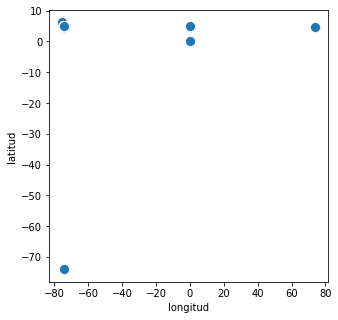

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='longitud', y='latitud',s=100, data=basa_global_analitica)